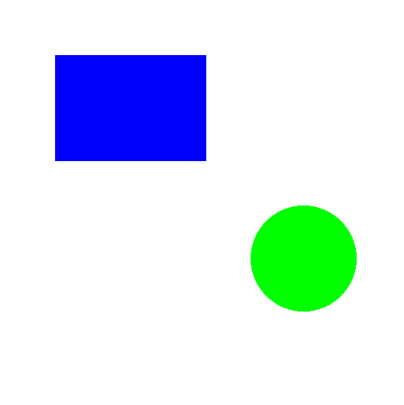

In [23]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Image RGB fond blanc
w, h = 512, 512
img = Image.new("RGB", (w, h), (255, 255, 255))
draw = ImageDraw.Draw(img)

# Formes (coordonnées partagées avec le masque)
rect_bbox = [60, 60, 260, 200]          # (x1, y1) -> (x2, y2)
circle_bbox = [320, 260, 460, 400]      # bounding box de l'ellipse

# Rectangle bleu
draw.rectangle(rect_bbox, fill=(0, 0, 255))

# Cercle vert
draw.ellipse(circle_bbox, fill=(0, 255, 0))

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis("off")
plt.show()


Pixels par classe: {0: 218206, 1: 28341, 2: 15597}


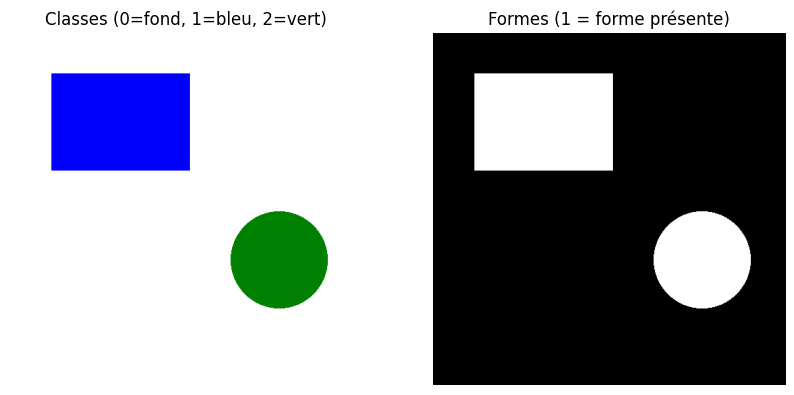

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Détection des formes à partir de l'image RGB (par couleur)
img_np = np.array(img, dtype=np.uint8)

is_blue = (img_np[:, :, 0] == 0) & (img_np[:, :, 1] == 0) & (img_np[:, :, 2] == 255)
is_green = (img_np[:, :, 0] == 0) & (img_np[:, :, 1] == 255) & (img_np[:, :, 2] == 0)

# Masque de segmentation (0 = fond, 1 = rectangle bleu, 2 = cercle vert)
mask_np = np.zeros(img_np.shape[:2], dtype=np.uint8)
mask_np[is_blue] = 1
mask_np[is_green] = 2

# Masque binaire: 1 là où il y a des formes (bleu ou vert), 0 pour le fond
shapes_mask_np = (mask_np != 0).astype(np.uint8)

# Debug simple: nombre de pixels par classe
unique, counts = np.unique(mask_np, return_counts=True)
print("Pixels par classe:", dict(zip(unique.tolist(), counts.tolist())))

# Affichage: couleurs fixes (évite l'effet 'violet/jaune' de viridis)
class_cmap = ListedColormap(["white", "blue", "green"])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mask_np, vmin=0, vmax=2, cmap=class_cmap)
ax[0].axis("off")
ax[0].set_title("Classes (0=fond, 1=bleu, 2=vert)")

ax[1].imshow(shapes_mask_np, vmin=0, vmax=1, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Formes (1 = forme présente)")

plt.show()


In [25]:
from pathlib import Path
from PIL import Image
import numpy as np

out_dir = Path(".")
mask_path = out_dir / "mask.png"
mask_raw_path = out_dir / "mask_raw.png" 
shapes_mask_path = out_dir / "mask_shapes.png"

# 1) Masque "raw" (0/1/2) -> il peut paraître noir dans un viewer car les valeurs sont très faibles
Image.fromarray(mask_np.astype(np.uint8), mode="L").save(mask_raw_path)

# 2) Masque palettisé -> affichage coloré dans un viewer
mask_pal = Image.fromarray(mask_np.astype(np.uint8), mode="P")
# Palette: index 0=blanc, 1=bleu, 2=vert (le reste noir)
palette = [255, 255, 255, 0, 0, 255, 0, 255, 0] + [0, 0, 0] * (256 - 3)
mask_pal.putpalette(palette)
mask_pal.save(mask_path)

# 3) Masque des formes (1 là où il y a une forme, 0 pour le fond)
Image.fromarray((shapes_mask_np * 255).astype(np.uint8), mode="L").save(shapes_mask_path)

print(f"Masque (palettisé) enregistré: {mask_path.resolve()}")
print(f"Masque raw (0/1/2) enregistré: {mask_raw_path.resolve()}")
print(f"Masque des formes enregistré: {shapes_mask_path.resolve()}")


Masque (palettisé) enregistré: /home/finex/Documents/IIM_A4/spé-IA/image-generation/mask.png
Masque raw (0/1/2) enregistré: /home/finex/Documents/IIM_A4/spé-IA/image-generation/mask_raw.png
Masque des formes enregistré: /home/finex/Documents/IIM_A4/spé-IA/image-generation/mask_shapes.png
